In [636]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [637]:
df_google = pd.read_csv("googleplaystore.csv")

In [638]:
df_google.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [639]:
df_google.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [640]:
df_google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [641]:
df_google.isnull()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,False,False,False,False,False,False,False,False,False,False,False,False,False
10837,False,False,False,False,False,False,False,False,False,False,False,False,False
10838,False,False,True,False,False,False,False,False,False,False,False,False,False
10839,False,False,False,False,False,False,False,False,False,False,False,False,False


In [642]:
df_google.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

# Checking the specific row with known issue

In [643]:
dates = pd.to_datetime(df_google["Last Updated"], errors="coerce")


invalid_dates = df_google[dates.isna()]["Last Updated"]
print(invalid_dates.unique())

['1.0.19']


In [644]:
df_google[df_google["Last Updated"] == "1.0.19"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [645]:
df_google.loc[10472]  

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              1.9
Rating                                               19.0
Reviews                                              3.0M
Size                                               1,000+
Installs                                             Free
Type                                                    0
Price                                            Everyone
Content Rating                                        NaN
Genres                                  February 11, 2018
Last Updated                                       1.0.19
Current Ver                                    4.0 and up
Android Ver                                           NaN
Name: 10472, dtype: object

In [646]:
df_google["Genres"]

0                     Art & Design
1        Art & Design;Pretend Play
2                     Art & Design
3                     Art & Design
4          Art & Design;Creativity
                   ...            
10836                    Education
10837                    Education
10838                      Medical
10839            Books & Reference
10840                    Lifestyle
Name: Genres, Length: 10841, dtype: object

In [647]:
df_google.loc[10472]  

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              1.9
Rating                                               19.0
Reviews                                              3.0M
Size                                               1,000+
Installs                                             Free
Type                                                    0
Price                                            Everyone
Content Rating                                        NaN
Genres                                  February 11, 2018
Last Updated                                       1.0.19
Current Ver                                    4.0 and up
Android Ver                                           NaN
Name: 10472, dtype: object

In [648]:
df_google.loc[10472, "Last Updated"] = pd.to_datetime("2025-08-16")
df_google["Last Updated"] = pd.to_datetime(df_google["Last Updated"])

In [649]:
df_google.dtypes

App                       object
Category                  object
Rating                   float64
Reviews                   object
Size                      object
Installs                  object
Type                      object
Price                     object
Content Rating            object
Genres                    object
Last Updated      datetime64[ns]
Current Ver               object
Android Ver               object
dtype: object

## Fix row 10472 in genres with mode


In [650]:
df_google.loc[10472, "Genres"] = "NaN"
df_google["Genres"] = df_google["Genres"].replace("NaN", df_google["Genres"].mode()[0])


In [651]:
df_google.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [652]:
df_google["Last Updated"] = pd.to_datetime(df_google["Last Updated"])

In [653]:
df_google.loc[10472]  

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              1.9
Rating                                               19.0
Reviews                                              3.0M
Size                                               1,000+
Installs                                             Free
Type                                                    0
Price                                            Everyone
Content Rating                                        NaN
Genres                                              Tools
Last Updated                          2025-08-16 00:00:00
Current Ver                                    4.0 and up
Android Ver                                           NaN
Name: 10472, dtype: object

In [654]:
df_google.describe()

,Rating,Last Updated
count,9367.000000,10841
mean,4.193338,2017-11-21 12:58:14.732957952
min,1.000000,2010-05-21 00:00:00
25%,4.000000,2017-09-20 00:00:00
50%,4.300000,2018-05-24 00:00:00
75%,4.500000,2018-07-20 00:00:00
max,19.000000,2025-08-16 00:00:00
std,0.537431,NaN


## Rating max is not true

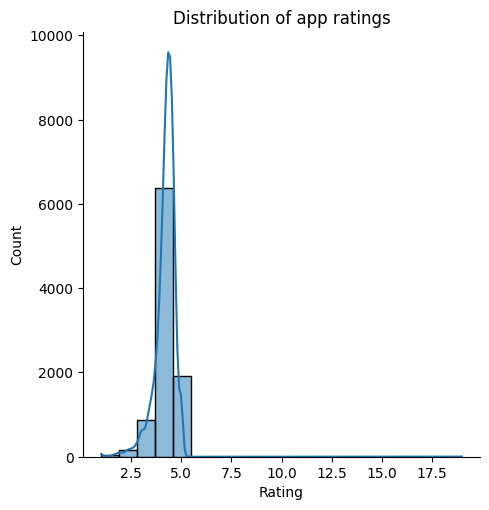

In [655]:
sns.displot(df_google['Rating'], bins=20, kde=True)
plt.title('Distribution of app ratings')
plt.show()

In [656]:
df_google[df_google['Rating'] > 5.0]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,Tools,2025-08-16,4.0 and up,NaN


# Replace ratings greater than 5.0 with the mean rating

In [657]:

mean_rating = df_google['Rating'].mean()
df_google.loc[df_google['Rating'] > 5.0, 'Rating'] = mean_rating

In [658]:
df_google.describe()

,Rating,Last Updated
count,9367.000000,10841
mean,4.191758,2017-11-21 12:58:14.732957952
min,1.000000,2010-05-21 00:00:00
25%,4.000000,2017-09-20 00:00:00
50%,4.300000,2018-05-24 00:00:00
75%,4.500000,2018-07-20 00:00:00
max,5.000000,2025-08-16 00:00:00
std,0.515191,NaN


In [659]:
df_google.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

# Split Genres


In [660]:
new_genres = df_google["Genres"].str.split(";", expand=True)
print(new_genres)
df_google["Genres"] = new_genres[0]
df_google.head()

                       0             1
0           Art & Design          None
1           Art & Design  Pretend Play
2           Art & Design          None
3           Art & Design          None
4           Art & Design    Creativity
...                  ...           ...
10836          Education          None
10837          Education          None
10838            Medical          None
10839  Books & Reference          None
10840          Lifestyle          None

[10841 rows x 2 columns]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design,2018-06-20,1.1,4.4 and up


## Solving Content Rating with mode

In [661]:
df_google[df_google["Content Rating"].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,4.193338,3.0M,"1,000+",Free,0,Everyone,NaN,Tools,2025-08-16,4.0 and up,NaN


In [662]:
df_google["Content Rating"] = df_google["Content Rating"].fillna(  df_google["Content Rating"].mode()[0])
df_google.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [663]:
df_google[df_google["Android Ver"].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.400000,230,11M,"1,000+",Paid,$1.49,Everyone,Personalization,2018-07-20,4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.500000,189,2.1M,"10,000+",Free,0,Everyone,Personalization,2018-03-27,1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,4.193338,3.0M,"1,000+",Free,0,Everyone,Everyone,Tools,2025-08-16,4.0 and up,NaN


# Solving Problem by dropping them but I did'nt drop them from first to learn and try

In [664]:
df_google.dropna(subset=["Android Ver"], inplace=True)
df_google.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          0
dtype: int64

In [665]:
df_google["App"].unique()

array(['Photo Editor & Candy Camera & Grid & ScrapBook',
       'Coloring book moana',
       'U Launcher Lite – FREE Live Cool Themes, Hide Apps', ...,
       'Parkinson Exercices FR', 'The SCP Foundation DB fr nn5n',
       'iHoroscope - 2018 Daily Horoscope & Astrology'],
      shape=(9657,), dtype=object)

In [666]:
df_google["Category"].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [667]:
df_google["Last Updated"].unique()

<DatetimeArray>
['2018-01-07 00:00:00', '2018-01-15 00:00:00', '2018-08-01 00:00:00',
 '2018-06-08 00:00:00', '2018-06-20 00:00:00', '2017-03-26 00:00:00',
 '2018-04-26 00:00:00', '2018-06-14 00:00:00', '2017-09-20 00:00:00',
 '2018-07-03 00:00:00',
 ...
 '2015-11-23 00:00:00', '2012-06-17 00:00:00', '2015-02-27 00:00:00',
 '2013-12-18 00:00:00', '2012-02-06 00:00:00', '2014-11-25 00:00:00',
 '2016-05-19 00:00:00', '2014-01-20 00:00:00', '2014-02-16 00:00:00',
 '2014-03-23 00:00:00']
Length: 1377, dtype: datetime64[ns]

# There is something wrong with this

In [668]:
df_google["Current Ver"].unique()

array(['1.0.0', '2.0.0', '1.2.4', ..., '1.0.612928', '0.3.4', '2.0.148.0'],
      shape=(2832,), dtype=object)

In [669]:
df_google[df_google["Current Ver"] == "1.2.4"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
4963,ONScripter Plus (Ad Free),GAME,4.5,100,17M,"1,000+",Paid,$3.99,Everyone,Adventure,2016-04-07,1.2.4,4.1 and up
5204,Lyra Virtual Assistant,PRODUCTIVITY,4.5,41624,3.4M,"1,000,000+",Free,0,Everyone,Productivity,2018-05-24,1.2.4,4.0.3 and up
6588,iFORA BP,MEDICAL,3.4,18,45M,"1,000+",Free,0,Everyone,Medical,2018-06-05,1.2.4,2.3.3 and up
6875,BV Rando,TRAVEL_AND_LOCAL,NaN,0,3.6M,100+,Free,0,Everyone,Travel & Local,2016-07-22,1.2.4,4.0 and up
7147,CB Heroes,SOCIAL,5.0,5,1.8M,5+,Free,0,Everyone,Social,2018-08-04,1.2.4,5.0 and up
7426,CJ VLC HD Remote (+ Stream),VIDEO_PLAYERS,4.2,4074,1.3M,"500,000+",Free,0,Everyone,Video Players & Editors,2013-11-13,1.2.4,2.1 and up
10282,FD Shift Calendar Widget,TOOLS,4.1,981,73k,"100,000+",Free,0,Everyone,Tools,2011-03-16,1.2.4,1.6 and up
10748,FP Live,COMMUNICATION,NaN,0,3.3M,10+,Free,0,Teen,Communication,2017-11-03,1.2.4,4.2 and up
10750,Finger Scanner Gestures,TOOLS,4.2,2531,3.3M,"100,000+",Free,0,Everyone,Tools,2017-07-30,1.2.4,6.0 and up


In [670]:
df_google["Reviews"].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'],
      shape=(6001,), dtype=object)

In [671]:
df_google["Size"].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [672]:
df_google["Size_MB"] = df_google["Size"].apply(lambda x: float(x.replace("M", "")) if "M" in x else float(x.replace("k", "")) / 1000 if "k" in x else x)

In [673]:
df_google = df_google.drop("Size", axis=1)

In [674]:
df_google["Size_MB"] = pd.to_numeric(df_google["Size_MB"], errors="coerce")

In [675]:
df_google["Size_MB"] = df_google.groupby('Category')['Size_MB'].transform(lambda x: x.fillna(x.median()))

In [676]:
df_google["Installs"].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [677]:
df_google["Installs"] = df_google["Installs"].str.replace("+" , "").str.replace(",", "")
df_google["Installs"] = pd.to_numeric(df_google["Installs"], errors="coerce")

In [678]:

df_google["Type"]=df_google["Type"].replace(np.nan, df_google["Type"].mode()[0])
df_google.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          0
Size_MB              0
dtype: int64

In [679]:
df_google["Type"].unique()

array(['Free', 'Paid'], dtype=object)

In [680]:
df_google["Price"].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [681]:
# Remove $ from price before conversion to float
df_google['Price'] = df_google['Price'].str.strip("$")
# Print header to make sure change was done
df_google['Price'].head()

0    0
1    0
2    0
3    0
4    0
Name: Price, dtype: object

In [682]:
df_google['Price'] = df_google['Price'].astype('float')
# Calculate mean of price after conversion
df_google['Price'].mean()

np.float64(1.02742018822661)

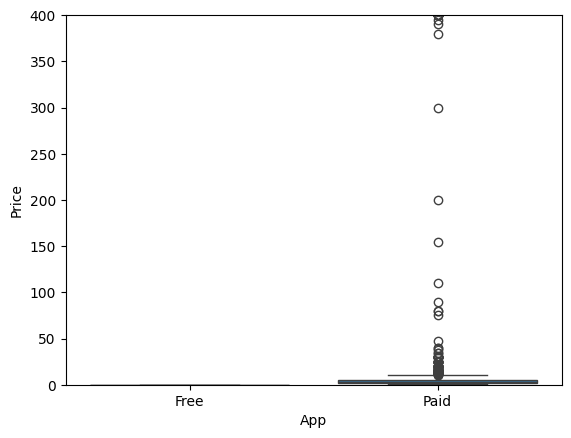

In [683]:
sns.boxplot(x = 'Type', y = 'Price', data = df_google)
plt.ylim(0, 400)
plt.xlabel('App')
plt.ylabel('Price')
plt.show()

# free and paid colomn is correct

In [684]:
df_google[(df_google["Type"] == "Paid") & (df_google["Price"] == 0)]

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_MB


In [685]:
df_google[(df_google["Type"] == "Free") & (df_google["Price"] != 0)]

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_MB


In [686]:
df_google["Content Rating"].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [687]:
df_google["Android Ver"].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

## Fix Rating NaN

In [688]:
df_google.groupby('Category')['Rating'].mean()

Category
ART_AND_DESIGN         4.358065
AUTO_AND_VEHICLES      4.190411
BEAUTY                 4.278571
BOOKS_AND_REFERENCE    4.346067
BUSINESS               4.121452
COMICS                 4.155172
COMMUNICATION          4.158537
DATING                 3.970769
EDUCATION              4.389032
ENTERTAINMENT          4.126174
EVENTS                 4.435556
FAMILY                 4.192272
FINANCE                4.131889
FOOD_AND_DRINK         4.166972
GAME                   4.286326
HEALTH_AND_FITNESS     4.277104
HOUSE_AND_HOME         4.197368
LIBRARIES_AND_DEMO     4.178462
LIFESTYLE              4.094904
MAPS_AND_NAVIGATION    4.051613
MEDICAL                4.189143
NEWS_AND_MAGAZINES     4.132189
PARENTING              4.300000
PERSONALIZATION        4.335256
PHOTOGRAPHY            4.192114
PRODUCTIVITY           4.211396
SHOPPING               4.259664
SOCIAL                 4.255598
SPORTS                 4.223511
TOOLS                  4.047411
TRAVEL_AND_LOCAL       4.109292

In [689]:
df_google['Rating'] = df_google.groupby('Category')['Rating'].transform(lambda x: x.fillna(x.mean()))

In [690]:
df_google.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       0
Size_MB           0
dtype: int64

In [691]:
df_google[df_google["Current Ver"].isnull()]

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_MB
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.200000,55,5000,Free,0.00,Everyone,Art & Design,2018-06-06,NaN,4.2 and up,2.700
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.100000,20145,1000000,Free,0.00,Everyone,Libraries & Demo,2013-02-12,NaN,1.5 and up,0.011
6322,Virtual DJ Sound Mixer,TOOLS,4.200000,4010,500000,Free,0.00,Everyone,Tools,2017-05-10,NaN,4.0 and up,8.700
6803,BT Master,FAMILY,4.192272,0,100,Free,0.00,Everyone,Education,2016-11-06,NaN,1.6 and up,0.222
7333,Dots puzzle,FAMILY,4.000000,179,50000,Paid,0.99,Everyone,Puzzle,2018-04-18,NaN,4.0 and up,14.000
7407,Calculate My IQ,FAMILY,4.192272,44,10000,Free,0.00,Everyone,Entertainment,2017-04-03,NaN,2.3 and up,7.200
7730,UFO-CQ,TOOLS,4.047411,1,10,Paid,0.99,Everyone,Tools,2016-07-04,NaN,2.0 and up,0.237
10342,La Fe de Jesus,BOOKS_AND_REFERENCE,4.346067,8,1000,Free,0.00,Everyone,Books & Reference,2017-01-31,NaN,3.0 and up,0.658


In [692]:
df_google.dropna(subset=["Current Ver"], inplace=True)
df_google.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
Size_MB           0
dtype: int64

In [693]:
df_google["Reviews"] = pd.to_numeric(df_google["Reviews"], errors="coerce")

In [694]:
df_google.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10830 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10830 non-null  object        
 1   Category        10830 non-null  object        
 2   Rating          10830 non-null  float64       
 3   Reviews         10830 non-null  int64         
 4   Installs        10830 non-null  int64         
 5   Type            10830 non-null  object        
 6   Price           10830 non-null  float64       
 7   Content Rating  10830 non-null  object        
 8   Genres          10830 non-null  object        
 9   Last Updated    10830 non-null  datetime64[ns]
 10  Current Ver     10830 non-null  object        
 11  Android Ver     10830 non-null  object        
 12  Size_MB         10830 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(7)
memory usage: 1.2+ MB


In [699]:
df_google[df_google["Reviews"]>df_google["Installs"]]
#NOT LOGICAL

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_MB
2454,KBA-EZ Health Guide,MEDICAL,5.000000,4,1,Free,0.00,Everyone,Medical,2018-08-02,1.0.72,4.0.3 and up,25.000
4550,RMEduS - 음성인식을 활용한 R 프로그래밍 실습 시스템,FAMILY,4.192272,4,1,Free,0.00,Everyone,Education,2018-07-17,1.0.1,4.4 and up,64.000
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.800000,10249,10000,Paid,2.49,Everyone,Lifestyle,2018-07-30,Varies with device,Varies with device,9.700
5812,AX Watch for WatchMaker,PERSONALIZATION,4.335256,2,1,Paid,0.99,Everyone,Personalization,2017-08-18,1.0,2.3 and up,0.238
5917,Ra Ga Ba,GAME,5.000000,2,1,Paid,1.49,Everyone,Arcade,2017-02-08,1.0.4,2.3 and up,20.000
6508,Sam.BN Pro,TOOLS,4.047411,11,10,Paid,0.99,Everyone,Tools,2015-03-27,1.0.0,4.0.3 and up,2.000
6700,Brick Breaker BR,GAME,5.000000,7,5,Free,0.00,Everyone,Arcade,2018-07-23,1.0,4.1 and up,19.000
7402,Trovami se ci riesci,GAME,5.000000,11,10,Free,0.00,Everyone,Arcade,2017-03-11,0.1,2.3 and up,6.100
8591,DN Blog,SOCIAL,5.000000,20,10,Free,0.00,Teen,Social,2018-07-23,1.0,4.0 and up,4.200
9096,DZ Puzzle,FAMILY,4.192272,14,10,Paid,0.99,Everyone,Puzzle,2017-04-22,1.2,2.3 and up,47.000


In [700]:
df_google.loc[df_google["Reviews"] > df_google["Installs"], "Installs"] = df_google["Reviews"]


In [ ]:
df_google[df_google["Reviews"]>df_google["Installs"]]

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_MB


## Outliers for the Size

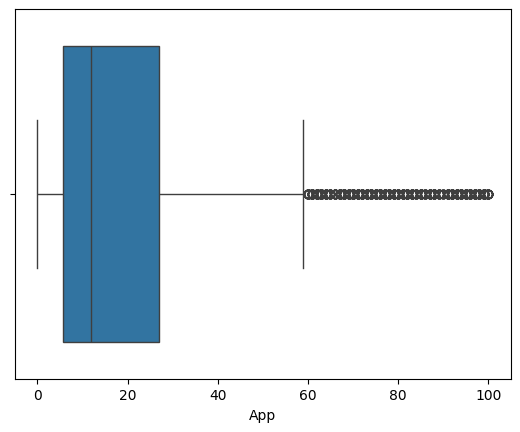

In [704]:
sns.boxplot(x = 'Size_MB', data = df_google)
plt.xlabel('App')
plt.show()


## Analytical Questions

1.	What is the most expensive app on the Play Store?

In [709]:
df_google.loc[df_google["Price"].idxmax(), "App"]


"I'm Rich - Trump Edition"

2.	Which genre has the highest number of apps?

In [711]:
df_google.loc[df_google["Installs"].idxmax(), "Genres"]

'Books & Reference'

3.	What is the average size of free vs. paid apps?

In [713]:
df_google.groupby("Type")["Size_MB"].mean()


Type
Free    20.458424
Paid    18.813635
Name: Size_MB, dtype: float64

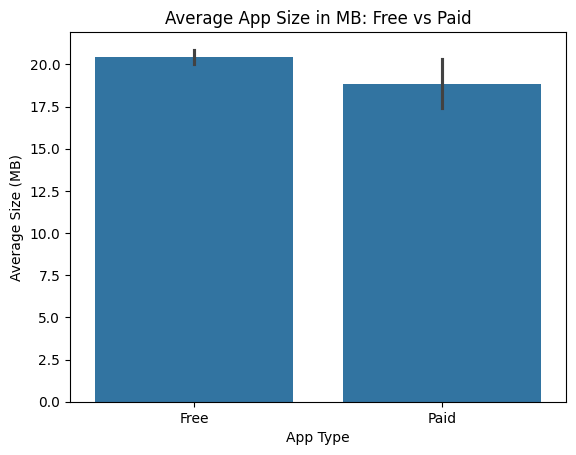

In [716]:
sns.barplot(x="Type", y="Size_MB", data=df_google)

plt.title("Average App Size in MB: Free vs Paid")
plt.ylabel("Average Size (MB)")
plt.xlabel("App Type")
plt.show()

4.	What are the top 5 most expensive apps with a perfect rating (5)?

In [723]:

df_google.sort_values(by="Rating", ascending=False).head(5)

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_MB
10690,FO Bixby,PERSONALIZATION,5.0,5,100,Paid,0.99,Everyone,Personalization,2018-04-25,0.2,7.0 and up,0.861
10742,GKPB FP Online Church,LIFESTYLE,5.0,32,1000,Free,0.00,Everyone,Lifestyle,2017-12-31,0.7.1,4.4 and up,7.900
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,100,Free,0.00,Everyone,Education,2018-07-06,1.0,4.1 and up,3.600
10776,Monster Ride Pro,GAME,5.0,1,10,Free,0.00,Everyone,Racing,2018-03-05,2.0,2.3 and up,24.000
10820,Fr. Daoud Lamei,FAMILY,5.0,22,1000,Free,0.00,Teen,Education,2018-06-27,3.8.0,4.1 and up,8.600


5.	How many apps have received more than 50K reviews?

In [726]:
len(df_google[df_google["Reviews"] > 50000])

2782

6.	What is the average price of apps, grouped by genre and number of installs?

In [729]:

df_google.groupby(["Genres", "Installs"])["Price"].mean().reset_index()



,Genres,Installs,Price
0,Action,10,0.000000
1,Action,50,0.663333
2,Action,100,1.096000
3,Action,500,0.995000
4,Action,1000,0.372500
...,...,...,...
716,Word,100000,0.000000
717,Word,1000000,0.000000
718,Word,5000000,0.000000
719,Word,10000000,0.000000


In [730]:
avg_price = df_google.groupby(["Genres", "Installs"])["Price"].mean().reset_index()
print(avg_price.head())


   Genres  Installs     Price
0  Action        10  0.000000
1  Action        50  0.663333
2  Action       100  1.096000
3  Action       500  0.995000
4  Action      1000  0.372500


7.	How many apps have a rating higher than 4.7, and what is their average price?

In [738]:
Average_Price = df_google[df_google["Rating"]>4.7]
len(Average_Price) 

595

In [741]:
Average_Price["Price"].mean()

np.float64(0.5018487394957983)

8.	What is Google's estimated revenue from apps with 5,000,000+ installs?
(Assuming Google takes a 30% cut from app sales)


In [754]:
apps_5m = df_google[df_google["Installs"] >= 5000000]
apps_5m["Revenue"] = apps_5m["Installs"] * apps_5m["Price"]
google_revenue = apps_5m["Revenue"].sum() * 0.3

print("Google's estimated revenue from apps with 5M+ installs: $", google_revenue)

Google's estimated revenue from apps with 5M+ installs: $ 44910000.0


C:\Users\Abdelrahman\AppData\Local\Temp\ipykernel_25004\2012081956.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apps_5m["Revenue"] = apps_5m["Installs"] * apps_5m["Price"]


9.	What are the maximum and minimum sizes of free vs. paid apps?

In [747]:
df_google[df_google["Price"] == df_google["Price"].max()]

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_MB
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,10000,Paid,400.0,Everyone,Lifestyle,2018-05-03,1.0.1,4.1 and up,7.3


10.	Is there a correlation between an app’s rating, number of reviews, size, and its price?

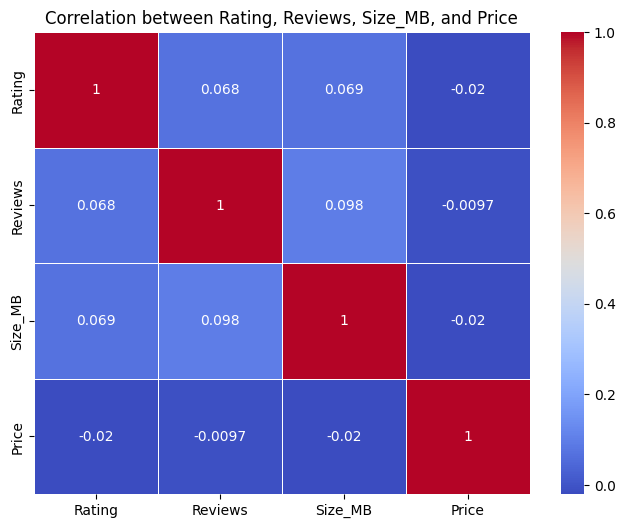

In [756]:
corr = df_google[["Rating", "Reviews", "Size_MB", "Price"]].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation between Rating, Reviews, Size_MB, and Price")
plt.show()

11.	How many apps exist for each type (free/paid) across different content ratings?

In [757]:
apps_table = pd.crosstab(df_google["Content Rating"], df_google["Type"])
print(apps_table)

Type             Free  Paid
Content Rating             
Adults only 18+     3     0
Everyone         8012   692
Everyone 10+      381    33
Mature 17+        479    20
Teen             1156    52
Unrated             2     0


In [758]:
apps_count = df_google.groupby(["Type", "Content Rating"])["App"].count().reset_index()

print(apps_count)



   Type   Content Rating   App
0  Free  Adults only 18+     3
1  Free         Everyone  8012
2  Free     Everyone 10+   381
3  Free       Mature 17+   479
4  Free             Teen  1156
5  Free          Unrated     2
6  Paid         Everyone   692
7  Paid     Everyone 10+    33
8  Paid       Mature 17+    20
9  Paid             Teen    52


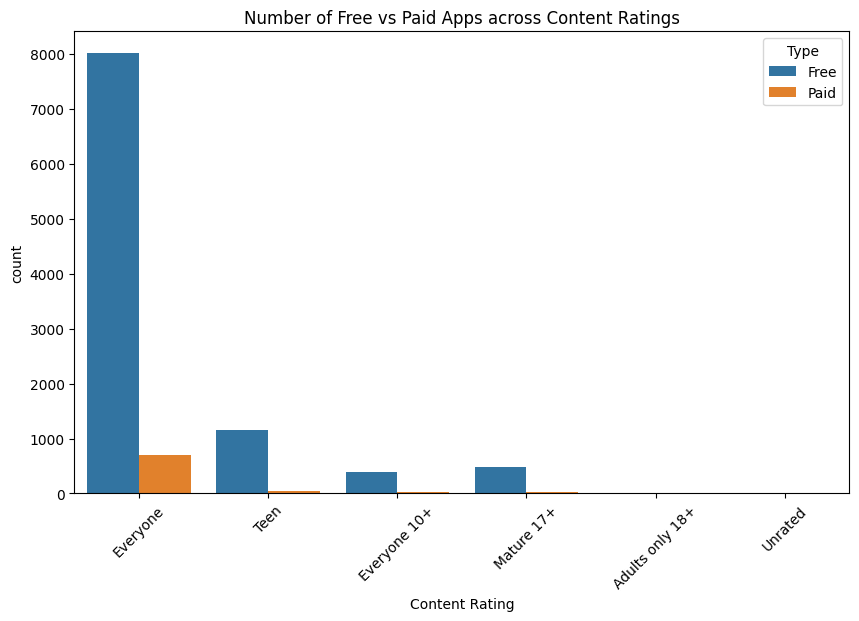

In [759]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_google, x="Content Rating", hue="Type")
plt.title("Number of Free vs Paid Apps across Content Ratings")
plt.xticks(rotation=45)
plt.show()

12.	How many apps are compatible with Android version 4.x?

In [760]:
compatible_apps = df_google[df_google["Android Ver"].str.startswith("4", na=False)]
print("Number of apps compatible with Android 4.x:", compatible_apps.shape[0])

Number of apps compatible with Android 4.x: 6956
